In [447]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import legacy as legacy_optimizers
import os
import sys

In [434]:
data_dir = 'project412/data1'

In [435]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 2934 files belonging to 2 classes.


In [105]:
# SCALE DATA

In [436]:
# VALUE OF RGB IS FROM 0-255 SO WE NORMALIZE/SCALE IT TO BE BETWEEN 0 AND 1
data = data.map(lambda x,y: (x/255,y))

In [306]:
scaled_iterator = data.as_numpy_iterator()

In [437]:
batch = scaled_iterator.next()

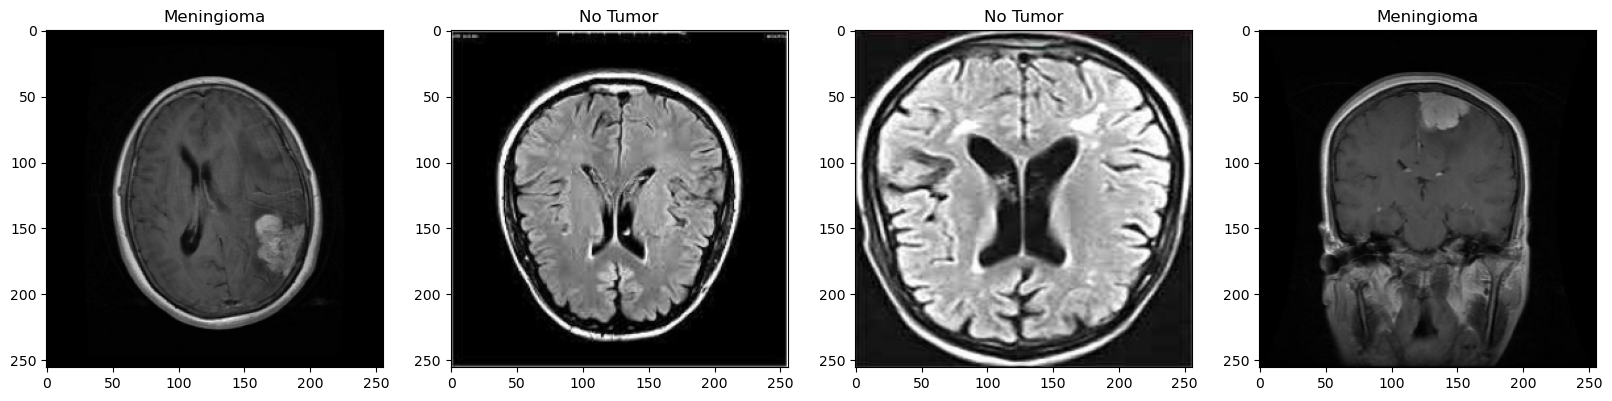

In [438]:
# Map numeric labels to class names
class_names = ["Meningioma", "No Tumor"]
numeric_labels = batch[1][:4]  # Replace with your actual numeric labels
class_labels = [class_names[label] for label in numeric_labels]

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, (img, class_label) in enumerate(zip(batch[0][:4], class_labels)):
    ax[idx].imshow(img)
    ax[idx].set_title(class_label)  # Use set_title instead of title.set_text

plt.show()

In [439]:
# Check for size of data
len(data)

92

In [440]:
# Spit data into training, validation and test set
train_size = int(len(data) * 0.7) # training 70% data
val_size = int(len(data) * 0.2) + 1 # validation 20% data
test_size = int(len(data) * 0.1) # test 10% data
test_size + train_size + val_size

92

In [441]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [313]:
# BUILD MODEL

In [442]:
model = Sequential()
model.add(Conv2D(16, (3, 3),1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1,activation ='sigmoid'))

In [448]:
custom_learning_rate = 0.001  # Replace with your desired learning rate

# Create an instance of the legacy Adam optimizer with the custom learning rate
custom_legacy_adam_optimizer = legacy_optimizers.Adam(learning_rate=custom_learning_rate)

# Compile your model using the legacy optimizer
model.compile(optimizer=custom_legacy_adam_optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [449]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 30, 30, 16)       

In [451]:
# Train your model for 20 epochs
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
64/64 [==============================] - 29s 452ms/step - loss: 0.4343 - accuracy: 0.7983 - val_loss: 0.2729 - val_accuracy: 0.9046
Epoch 2/20
64/64 [==============================] - 30s 459ms/step - loss: 0.1974 - accuracy: 0.9272 - val_loss: 0.1784 - val_accuracy: 0.9293
Epoch 3/20
64/64 [==============================] - 29s 453ms/step - loss: 0.1299 - accuracy: 0.9473 - val_loss: 0.1947 - val_accuracy: 0.9326
Epoch 4/20
64/64 [==============================] - 28s 439ms/step - loss: 0.0842 - accuracy: 0.9678 - val_loss: 0.1503 - val_accuracy: 0.9474
Epoch 5/20
64/64 [==============================] - 29s 451ms/step - loss: 0.0529 - accuracy: 0.9785 - val_loss: 0.2293 - val_accuracy: 0.9145
Epoch 6/20
64/64 [==============================] - 29s 444ms/step - loss: 0.0588 - accuracy: 0.9736 - val_loss: 0.1663 - val_accuracy: 0.9539
Epoch 7/20
64/64 [==============================] - 28s 445ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.1149 - val_accuracy: 0.9688

In [ ]:
# Plot performance

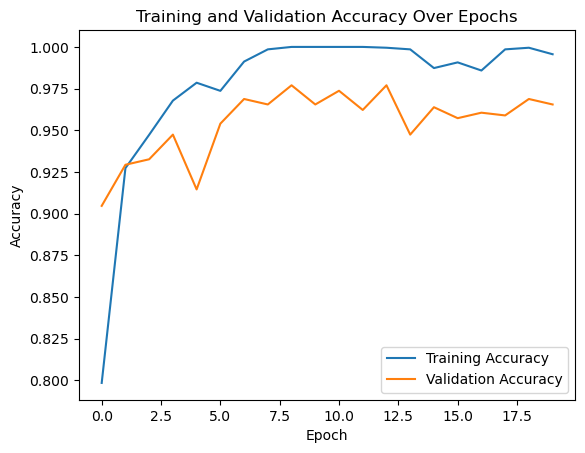

In [453]:
# Plot training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

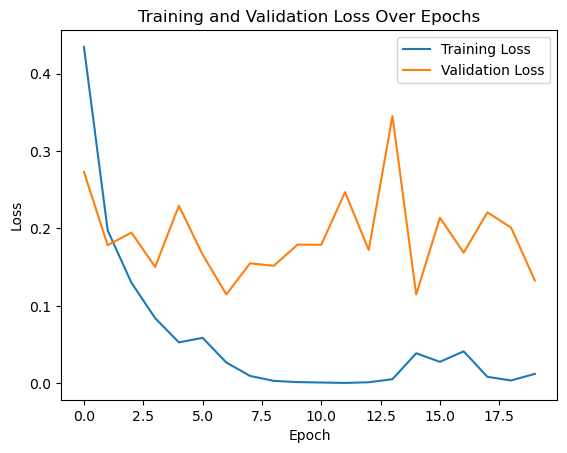

In [455]:
# Plot training and validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [297]:
#Evaluate

In [456]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [457]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 99ms/step


In [458]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}') #testing on unseen data

Precision:0.9346405267715454, Recall:0.9407894611358643, Accuracy:0.931654691696167


In [ ]:
# Save model


In [459]:
model.save('project412/models/mritumormodel.keras')

In [460]:
new_model = load_model(os.path.join('project412/models','mritumormodel.keras'))

In [465]:

original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')
# Path to the folder containing images
folder_path = 'project412/test_data/meningioma/'

# List all files in the folder
image_files = os.listdir(folder_path)
total_imgs = len(image_files)
correct_predictions = 0
# Iterate over each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image using TensorFlow
    resized_img = tf.image.resize(np.expand_dims(img, axis=0), (256, 256))

    # Make predictions
    predictions = new_model.predict(resized_img / 255.0)

    # Check the prediction and print the result
    if predictions < 0.5:
        correct_predictions+=1
    else:
        print(f'{image_file}: Predicted class is notumor')
sys.stdout = original_stdout
accuracy = correct_predictions / total_imgs
print(f'Meningioma')
print(f'Correct Prediction: {correct_predictions}')
print(f'Total images: {total_imgs}')
print(f'Accuracy rate: {accuracy * 100:.2f}%')


Meningioma
Correct Prediction: 289
Total images: 306
Accuracy rate: 94.44%


In [466]:
import os
import sys

original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')
# Path to the folder containing images
folder_path = 'project412/test_data/notumor/'

# List all files in the folder
image_files = os.listdir(folder_path)
total_imgs = len(image_files)
correct_predictions = 0
# Iterate over each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image using TensorFlow
    resized_img = tf.image.resize(np.expand_dims(img, axis=0), (256, 256))

    # Make predictions
    predictions = new_model.predict(resized_img / 255.0)

    # Check the prediction and print the result
    if predictions >= 0.5:
        correct_predictions+=1
    else:
        print(f'{image_file}: Predicted class is notumor')
sys.stdout = original_stdout
accuracy = correct_predictions / total_imgs
print(f'No Tumor')
print(f'Correct Prediction: {correct_predictions}')
print(f'Total images: {total_imgs}')
print(f'Accuracy rate: {accuracy * 100:.2f}%')


No Tumor
Correct Prediction: 399
Total images: 405
Accuracy rate: 98.52%
